##1. Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:

# Load the dataset
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
           "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

# Load data into a pandas DataFrame
data = pd.read_csv('/content/adult.data', names=columns, na_values=" ?", skipinitialspace=True)

# Display the few rows
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##2. Output the structure of the dataset

In [2]:
# Dataset structure
data.info()

# summary of the dataset
data.describe()

# Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


##3. Clean the dataset, handle the missing values, and encode the categorical values

In [3]:
# Handling missing values by dropping rows with missing data
data_clean = data.dropna()

# Encoding categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    data_clean[col] = le.fit_transform(data_clean[col])

data_clean.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


##4. Explore the data and generate 4 plots

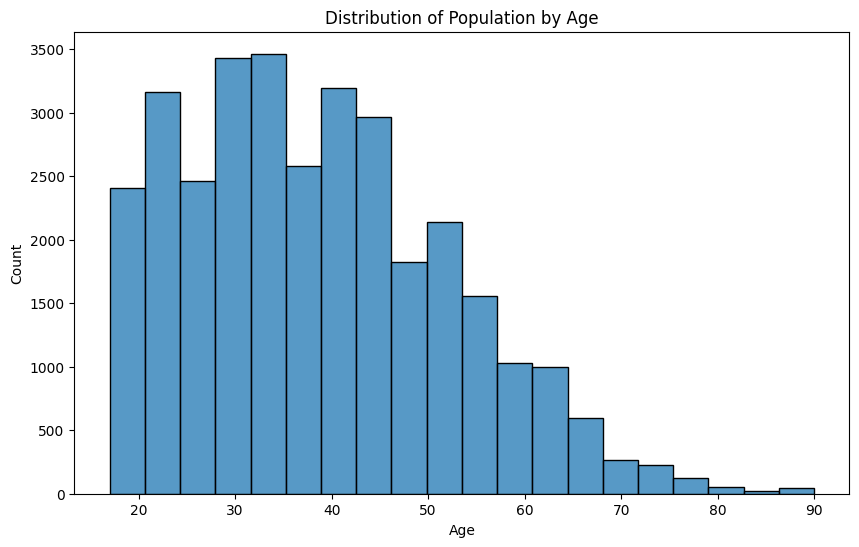

In [4]:
# Bar plot for population distribution by age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['age'], bins=20, kde=False)
plt.title('Distribution of Population by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


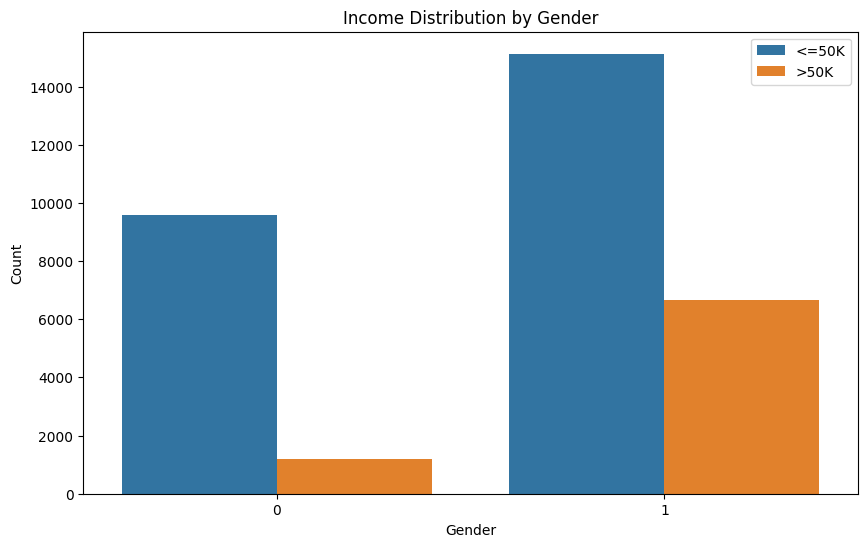

In [5]:
# Bar plot for income distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=data_clean)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


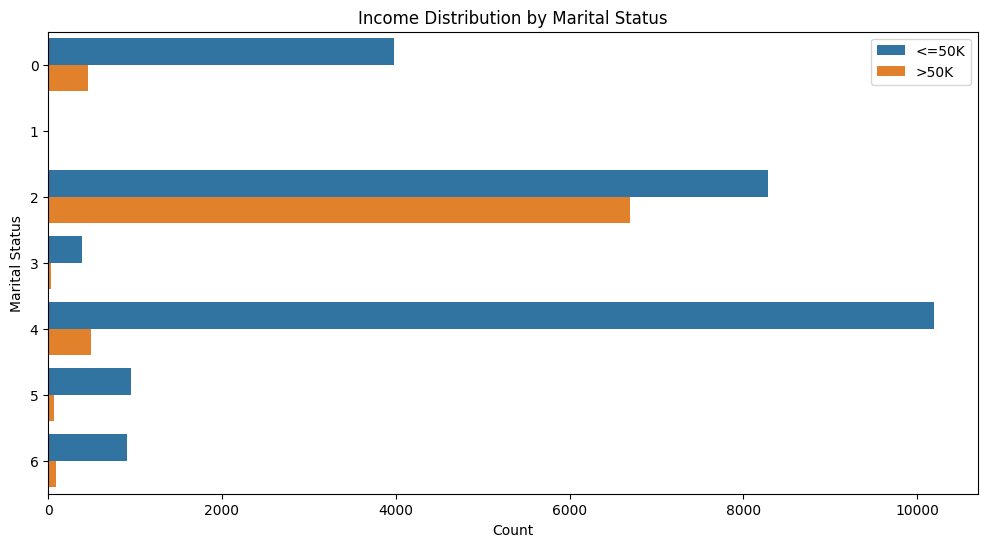

In [6]:
# Bar plot for marital status vs income
plt.figure(figsize=(12, 6))
sns.countplot(y='marital_status', hue='income', data=data_clean)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.legend(['<=50K', '>50K'])
plt.show()

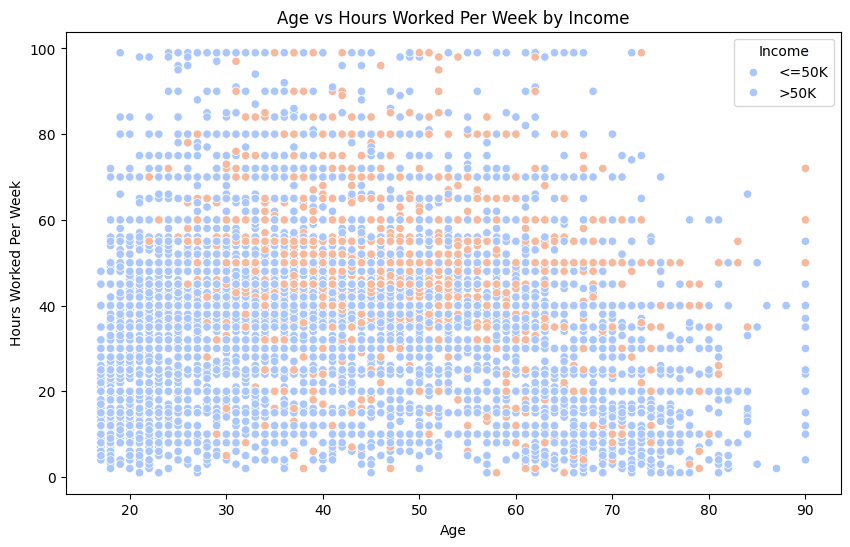

In [7]:
# Scatter plot for Age vs Hours Worked Per Week colored by income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=data_clean, palette='coolwarm')
plt.title('Age vs Hours Worked Per Week by Income')
plt.xlabel('Age')
plt.ylabel('Hours Worked Per Week')
plt.legend(['<=50K', '>50K'], title='Income')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


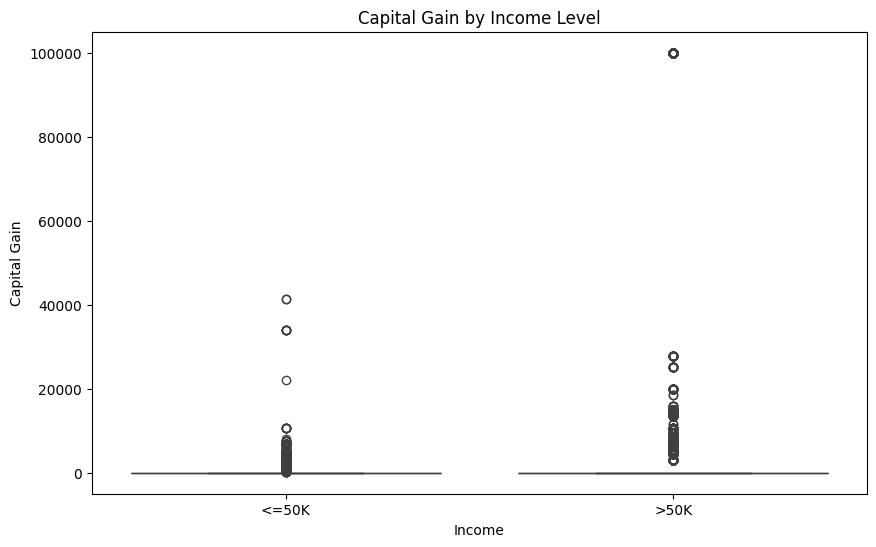

In [8]:
# Box plot for capital gain based on income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_gain', data=data_clean)
plt.title('Capital Gain by Income Level')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

##5. Apply predictive modeling to predict whether an individual earns more than $50K a year

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and labels
X = data_clean.drop('income', axis=1)
y = data_clean['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 85.85%
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.74      0.63      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

